In [17]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
from data_loader import data_loader
import librosa
from tqdm import tqdm
import matplotlib.pyplot as plt

In [30]:
CLASSES5 = ['angry', 'happy', 'neutral', 'sad', 'surprise']
CLASSES6 = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad']
CLASSES7 = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [19]:
# Load the model.
model_vgg = hub.load('https://tfhub.dev/google/vggish/1')

In [20]:
dl = data_loader(
    Crema_path='../Datasets/Crema/',
    Ravdess_path='../Datasets/Ravdess/',
    Savee_path='../Datasets/Savee/',
    Tess_path='../Datasets/Tess/',
    Banglaser_path='../Datasets/BanglaSER/',
    Subesco_path='../Datasets/SUBESCO/'
)

In [21]:
def get_embeddings(filename, label):
    data, sr = librosa.load(filename, sr=None, mono=True, res_type='kaiser_best')

    data, _ = librosa.effects.trim(data, top_db=25)

    if sr != 16000:
        data = librosa.resample(y=data, orig_sr=sr, target_sr=16000, res_type='kaiser_best')

    embeddings = model_vgg(data)
    num_embeddings = tf.shape(embeddings)[0]
    return embeddings, tf.repeat(label, num_embeddings)

In [22]:
tess = dl.get_tess_df()
savee = dl.get_savee_df()
ravdess = dl.get_ravdess_df()
crema = dl.get_crema_df()
subesco = dl.get_subesco_df()
banglaser = dl.get_banglaser_df()
all_en = dl.get_all_en_df()
all_bn = dl.get_all_bn_df()
all = dl.get_all_df()

In [34]:
crema.shape

(7442, 2)

In [31]:
def save_embeddings(df, filename):
    features = []
    labels = []

    if df['Emotion'].nunique() == 6:
        classes = CLASSES6
    elif df['Emotion'].nunique() == 5:
        classes = CLASSES5
    else:
        classes = CLASSES7

    for index, row in tqdm(df.iterrows(), total=df.shape[0]):
        embs, label = get_embeddings(row['File_Path'], row['Emotion'])
        assert(len(embs) == len(label))
        for i in range(embs.shape[0]):
            features.append(embs[i])
            labels.append(classes.index(label[i]))
    
    features = np.array(features)
    labels = np.array(labels)
    np.save(filename + 'X.npy', features)
    np.save(filename + 'y.npy', labels)

In [24]:
save_embeddings(tess, './features/vggish_emb/tess/')

100%|██████████| 2800/2800 [06:08<00:00,  7.59it/s]


In [25]:
save_embeddings(savee, './features/vggish_emb/savee/')

100%|██████████| 480/480 [02:00<00:00,  4.00it/s]


In [26]:
save_embeddings(ravdess, './features/vggish_emb/ravdess/')

100%|██████████| 1440/1440 [02:19<00:00, 10.29it/s]


In [35]:
save_embeddings(crema, './features/vggish_emb/crema/')

100%|██████████| 7442/7442 [05:25<00:00, 22.84it/s]


In [28]:
save_embeddings(subesco, './features/vggish_emb/subesco/')

100%|██████████| 7000/7000 [15:22<00:00,  7.59it/s]


In [32]:
save_embeddings(banglaser, './features/vggish_emb/bser/')

100%|██████████| 1467/1467 [01:59<00:00, 12.24it/s]


In [36]:
save_embeddings(all_en, './features/vggish_emb/all_en/')

100%|██████████| 12162/12162 [14:44<00:00, 13.75it/s]


In [37]:
save_embeddings(all_bn, './features/vggish_emb/all_bn/')

100%|██████████| 8467/8467 [16:46<00:00,  8.41it/s]


In [38]:
save_embeddings(all, './features/vggish_emb/all/')

100%|██████████| 20629/20629 [28:46<00:00, 11.95it/s]


# Testing

In [ ]:
# X = np.load('./features/vggish_emb/savee/X.npy', allow_pickle=True)
# y = np.load('./features/vggish_emb/savee/y.npy', allow_pickle=True)

In [ ]:
# X.shape, y.shape

In [ ]:
# X[200]

In [ ]:
# y[200]

In [ ]:
stop

# Spectogram

In [ ]:
from math import ceil


def plot_embeddings(df, name):

    if df['Emotion'].nunique() == 6:
        classes = CLASSES6
    else:
        classes = CLASSES7

    fig, axs = plt.subplots(2, ceil(len(classes) / 2), figsize=(15, 6), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .3, wspace=.3)
    fig.suptitle(f'{name} VGGish Embeddings')
    fig.tight_layout()
    axs = axs.ravel()

    for i in range(len(classes)):
        emb = get_embeddings(df[df['Emotion'] == classes[i]]['File_Path'].iloc[0], df[df['Emotion'] == classes[i]]['Emotion'].iloc[0])
        axs[i].plot(emb[0][0])
        # axs[i].imshow(emb[0].numpy(), aspect='auto', interpolation='nearest', origin='lower', cmap='jet')
        axs[i].set_title(classes[i])
    # plt.legend()
    # plt.show()

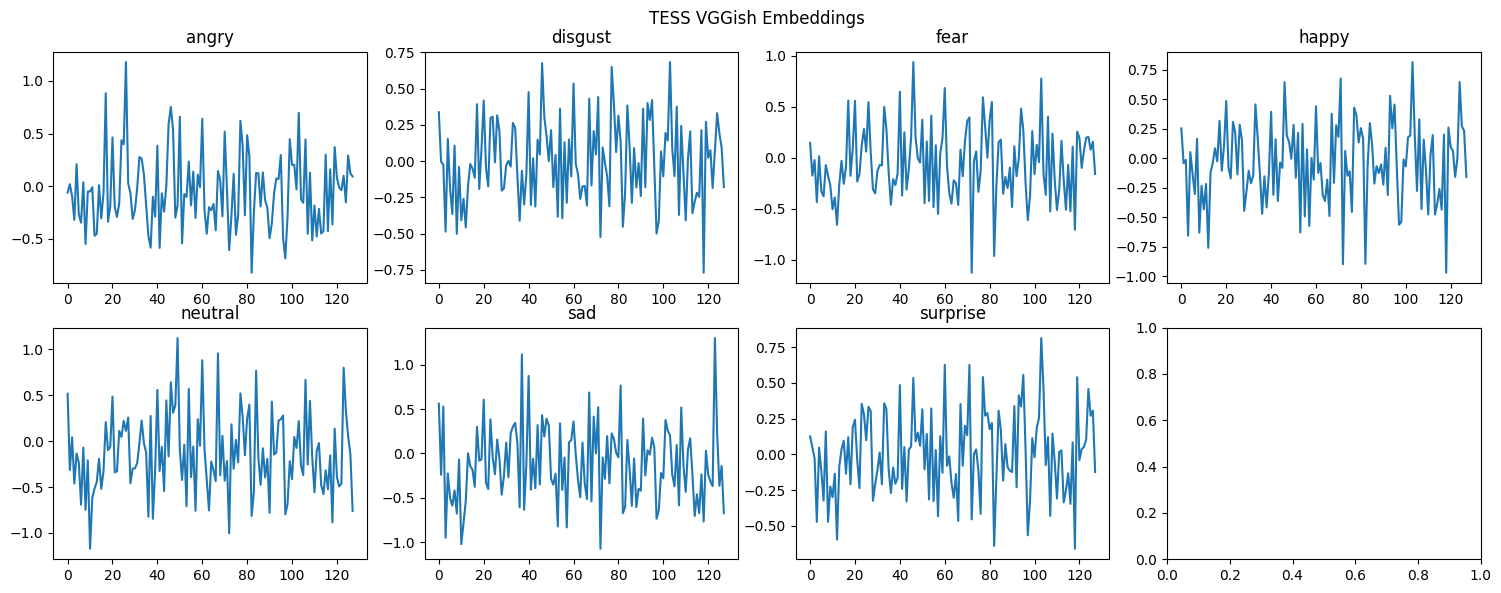

In [ ]:
plot_embeddings(tess, 'TESS')

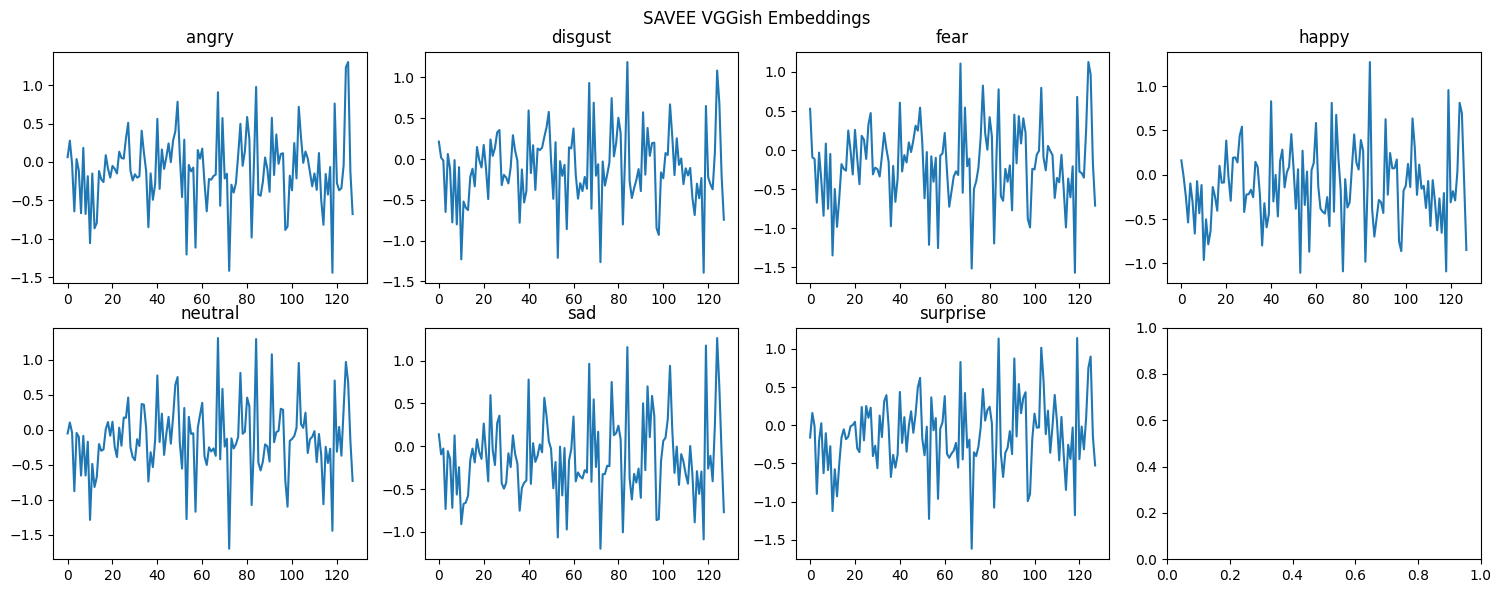

In [ ]:
plot_embeddings(savee, 'SAVEE')

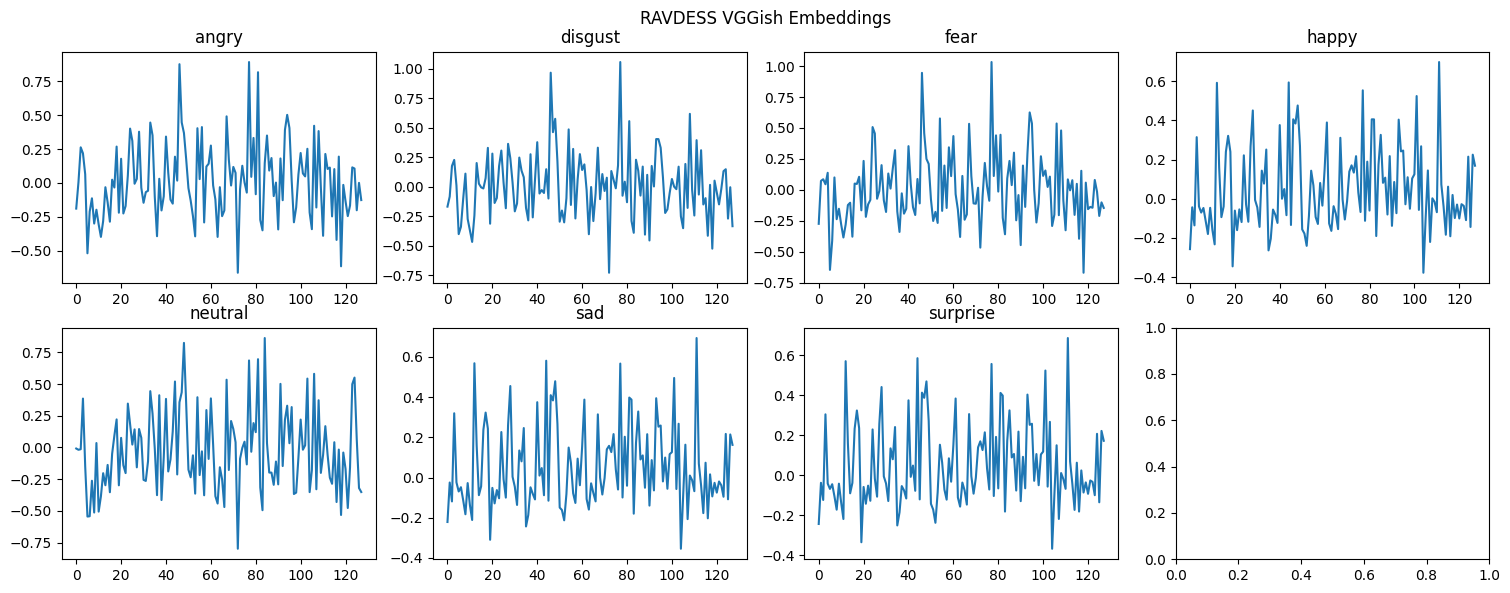

In [ ]:
plot_embeddings(ravdess, 'RAVDESS')

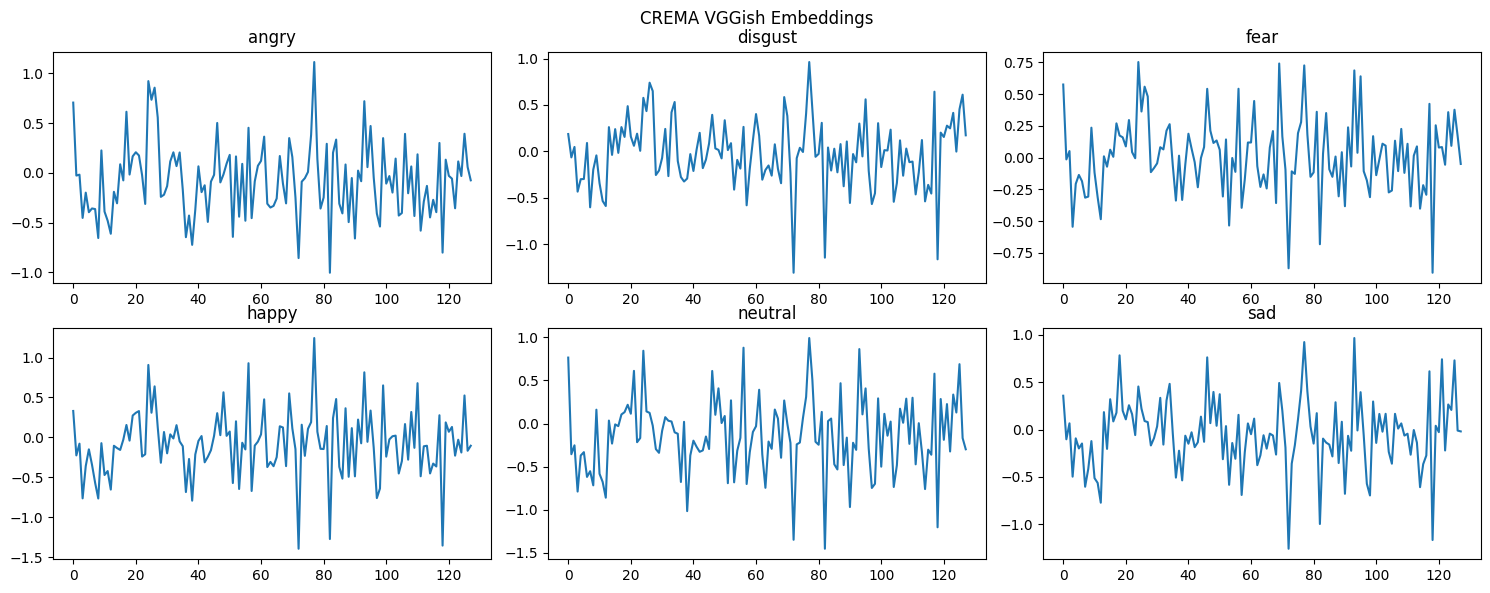

In [ ]:
plot_embeddings(crema, 'CREMA')